In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# 1
df = pd.read_csv("medical_examination.csv")
# 2
df['overweight'] = (df['weight']/(df['height']/100)**2 >25).astype(int)
# 3
df['cholesterol'] = (df['cholesterol']>1).astype(int)
df['gluc'] = (df['gluc']>1).astype(int)

In [7]:
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke',
    # 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index()
    
    # You will have to rename
    # one of the collumns for the catplot to work correctly.
    df_cat = df_cat.rename(columns={0:"total"})

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot (data=df_cat,kind='bar',x='variable',y='total',hue='value',col='cardio',palette='pastel')

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

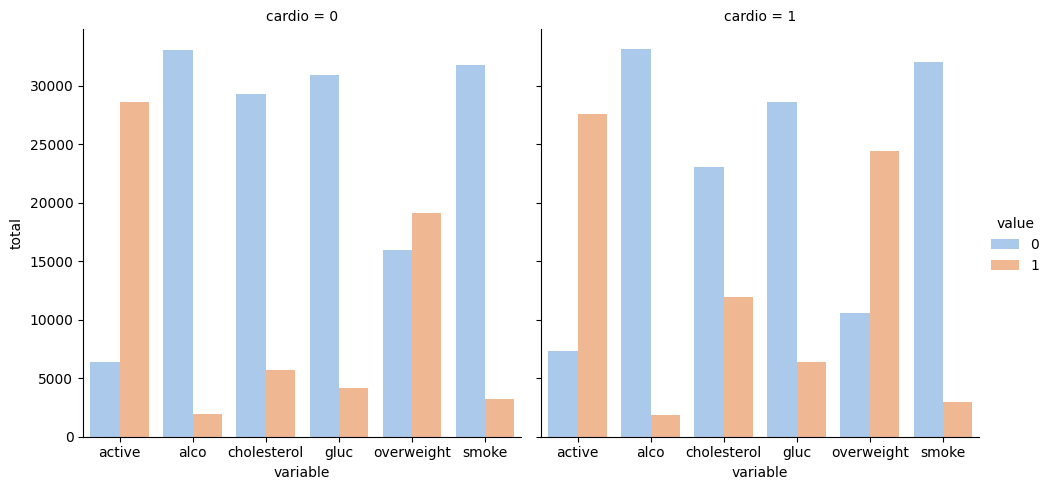

In [8]:
draw_cat_plot()

In [22]:
# Draw Heat Map
def draw_heat_map():
     # Clean the data
    df_heat = df[(df['ap_lo']<=df['ap_hi'])&
                 (df['height']>=df['height'].quantile(0.025))&
                 (df['height']<=df['height'].quantile(0.975))&
                 (df['weight']>=df['weight'].quantile(0.025))&
                 (df['weight']<=df['weight'].quantile(0.975))]

     # Calculate the correlation matrix
    corr = df_heat.corr('pearson')
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(16, 9))
    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr,mask=mask,square=True,linewidths=0.5,annot=True,fmt='0.1f',cmap='coolwarm')
    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


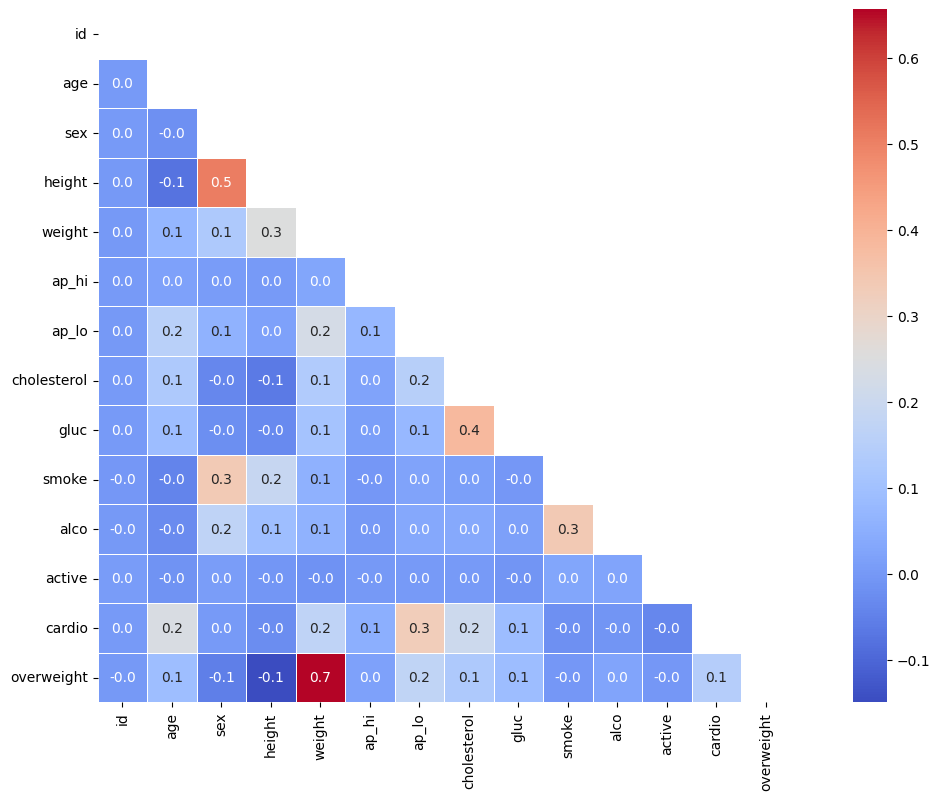

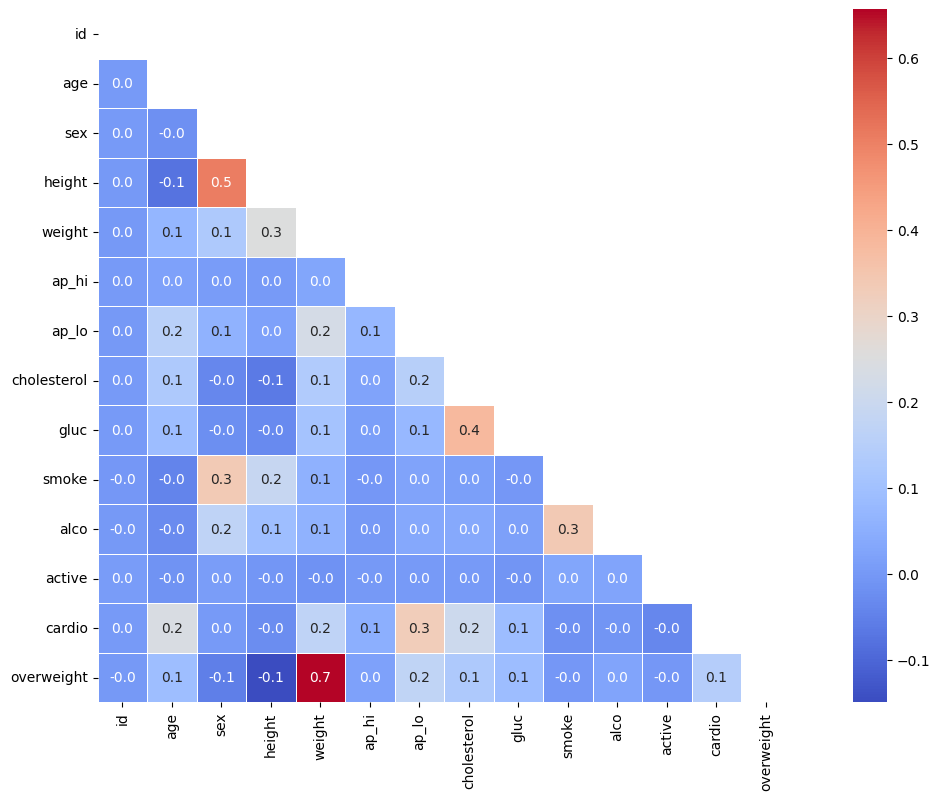

In [23]:
draw_heat_map()